In [1]:
# Environment: google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install d2l==0.13.2 -f https://d2l.ai/whl.html # installing d2l
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6


Looking in links: https://d2l.ai/whl.html
     |████████████████████████████████| 711.0MB 26kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, gluon, image, init, np, npx
from mxnet.gluon import nn
import os

npx.set_np()

In [4]:
%cd /content/drive/My\ Drive/course/K131/StrayAnimalsAnalysis/imgs/
!ls

/content/drive/My Drive/course/K131/StrayAnimalsAnalysis/imgs
test


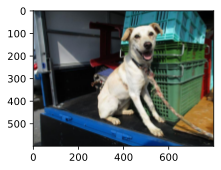

In [89]:
d2l.set_figsize((3.5, 2.5))
img = image.imread('./test/26396_in_org.JPG').asnumpy()
# img.shape
d2l.plt.imshow(img);

In [0]:
class myImageDataset(gluon.data.Dataset):
    """A dataset for loading image files stored in a folder structure.
    
    Parameters
    ----------
    root : str
        Path to root directory.
    flag : {0, 1}, default 1
        If 0, always convert loaded images to greyscale (1 channel).
        If 1, always convert loaded images to colored (3 channels).
    transform : callable, default None
        A function that takes data and label and transforms them::

            transform = lambda data, label: (data.astype(np.float32)/255, label)

    Attributes
    ----------
    synsets : list
        List of class names. `synsets[i]` is the name for the integer label `i`
    items : list of tuples
        List of all images in (filename, label) pairs.
    """

    def __init__(self, root, flag=1, transform=None):
        self._root = os.path.expanduser(root)
        self._flag = flag
        self._transform = transform
        self._exts = ['.jpg', '.jpeg', '.png']

    def _list_images(self, label):
        """list images from a folder"""
        self.items = []
        for filename in sorted(os.listdir(self._root)):
            filename = os.path.join(self._root, filename)
            print(filename)
            ext = os.path.splitext(filename)[1]
            if ext.lower() not in self._exts:
                warnings.warn('Ignoring %s of type %s. Only support %s'%(
                    filename, ext, ', '.join(self._exts)))
                continue
            self.items.append((filename, label))

    def _load_images(self, filename, label):
          self.items = list(zip(list(map(lambda x: os.path.join(self._root,x), filename)), label))

    def __getitem__(self, idx):
        img = image.imread(self.items[idx][0], self._flag)
        label = self.items[idx][1]
        if self._transform is not None:
            return self._transform(img, label)
        return img, label

    def __len__(self):
        return len(self.items)

In [0]:
root = "./test"
test = myImageDataset(root)
filename = ["26396_in_org.JPG", "26407_in_org.JPG"]
label = [0,1]
test._load_images(filename, label)

In [0]:
normalize = gluon.data.vision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.Resize(256),
    gluon.data.vision.transforms.CenterCrop(224),
    gluon.data.vision.transforms.ToTensor(),
    normalize])

after = test.transform_first(train_augs)

TypeError: ignored

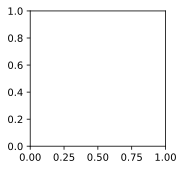

In [119]:
# d2l.plt.imshow(after.__getitem__(0)[0].asnumpy().astype('int32'))
d2l.plt.imshow(after.__getitem__(0)[0].asnumpy().astype('float32'))
# test.__getitem__(0)[0].shape
# gluon.data.vision.transforms.RandomFlipLeftRight()

# d2l.plt.imshow(test.__getitem__(0)[0])